The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

Four files are available on this site:

train-images-idx3-ubyte.gz:  training set images (9912422 bytes)
train-labels-idx1-ubyte.gz:  training set labels (28881 bytes)
t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes)
t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)

http://yann.lecun.com/exdb/mnist/

In this experiment we are using 8x8 pixel image (resized) dataset load_digits from sklearn.datasets https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html. 

- Classes : 10
- Samples per class : 180
- Samples total : 1797
- Dimensionality : 64
- Features : integers 0-16

### importing the required packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.metrics import classification_report

import seaborn as sns

import warnings
warnings.simplefilter("ignore")

### Loading the Dataset from sklearn datasets packages

In [4]:
digits = datasets.load_digits()

To get sense of the data, Let us visualize the digits. Each image contains [8×8] or 64 pixels. We could proceed by simply using each pixel value as a feature

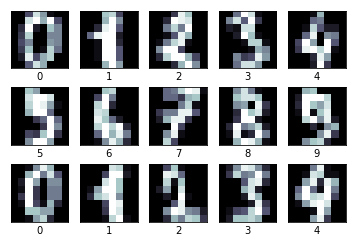

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])

In [6]:
display(digits.images.shape)

(1797, 8, 8)

To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [9]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 64)


For testing our classifier output, we will split the data into a training and testing set:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target,
                                                random_state=42)

Create a classifier: a support vector classifier

In [20]:
clf = svm.SVC(gamma=0.001, kernel='linear')
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)

Let's take a look at a few of the test images along with their predicted values:

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

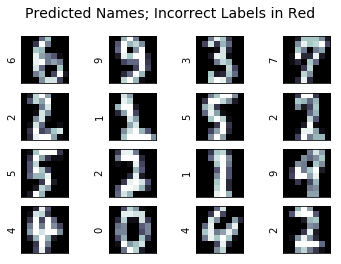

In [34]:
fig, ax = plt.subplots(4, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(digits.target[y_predict[i]],
                   color='black' if y_predict[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Out of this small sample, our classifier predicted correct for all the images. We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [41]:
digit_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, y_predict,
                            target_names=digit_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.98      0.93      0.96        46
           4       1.00      0.98      0.99        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.96      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



We might also display the confusion matrix between these classes:

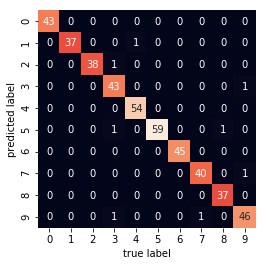

In [43]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digit_labels,
            yticklabels=digit_labels)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Assignment

#### Find the Model Accuracy for Different Gamma Values(0.001, 0.05), kernel=linear